In [21]:
# Sampling distribution lecture code for BSOS233
# created by Jacob J. Coutts

# Load required packages
import numpy as np 
from datascience import *
import random # allows us to set seed
import statistics # allows us to use math functions

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# set seed to reproduce results
random.seed(10172023)

# Read in the data 
marketing = Table.read_table("marketing.csv")

In [13]:
# create contingency table to understand data
piv_marketing = marketing.pivot("decision","ad")
piv_marketing

ad,not purchase,purchase
funny,117,58
informational,133,42


In [14]:
# find probability of purchasing if in the funny ad condition
funny_prob = piv_marketing.take(0)[2]/(piv_marketing.column("purchase")[0] + piv_marketing.take(0)[1])
# find the probability of purchasing if in the informational ad condition
informational_prob = piv_marketing.take(1)[2]/(piv_marketing.column("not purchase")[1] + piv_marketing.take(1)[2])
# find difference between groups
cond_dif = funny_prob-informational_prob
# print the probabilities
print(funny_prob) # should be .3314...
print(informational_prob) # should be .24
print(cond_dif) # should be .0914...
print(piv_marketing)

[ 0.33142857]
[ 0.24]
[ 0.09142857]
ad            | not purchase | purchase
funny         | 117          | 58
informational | 133          | 42


In [15]:
# shuffle for a single group and verify it works before simulating
n = marketing.num_rows # number of rows
shuffled_outcome = marketing.sample(n, with_replacement = False).column("decision") # shuffle Table and select the column
simulated_trial = Table().with_columns("ad", marketing.column("ad"), "decision", shuffled_outcome) # recreate table
psim = simulated_trial.pivot("decision","ad") # create pivot table for shuffled data
funny_sim_prob = psim.take(0)[2]/(psim.column("purchase")[0] + psim.take(0)[1]) # grab appropriate values for probabilty
informational_sim_prob = psim.take(1)[2]/(psim.column("not purchase")[1] + psim.take(1)[2]) # grab appropriate values for probabilty
sim_cond_dif = funny_sim_prob - informational_sim_prob # store difference

print(funny_sim_prob) # probability of purchasing under null in funny condition
print(informational_sim_prob) # probability of purchasing under null in informational condition
print(sim_cond_dif)
print(psim)

[ 0.27428571]
[ 0.29714286]
[-0.02285714]
ad            | not purchase | purchase
funny         | 127          | 48
informational | 123          | 52


In [16]:
funny_sim_prob = psim.take(0)[2]/(psim.column("purchase")[0] + psim.take(0)[1]) 


In [17]:
# simulate this many times for sampling distribution
iterations = 1000 # set number of loops
cond_dif_results = make_array() # array to store differences

# loop and store probability in each iteration. we will be doing what is in the prior code block many times
for i in np.arange(iterations):
    shuffled_outcome = marketing.sample(marketing.num_rows, with_replacement = False).column("decision") # shuffle table and grab outcome
    simulated_trial = Table().with_columns("ad", marketing.column("ad"), "decision", shuffled_outcome) # create table with og pred. and new outcome
    psim = simulated_trial.pivot("decision","ad") # create pivot table for shuffled data
    funny_sim_prob = psim.take(0)[2]/(psim.column("purchase")[0] + psim.take(0)[1]) # compute shuffled funny_sim_prob
    informational_sim_prob = psim.take(1)[2]/(psim.column("not purchase")[1] + psim.take(1)[2]) # compute shuffled informational_sim_prob
    cond_dif_results = np.append(cond_dif_results, funny_sim_prob - informational_sim_prob)

[ 0.09142857]
0.047949679792469564
[-0.09142857  0.10285714]


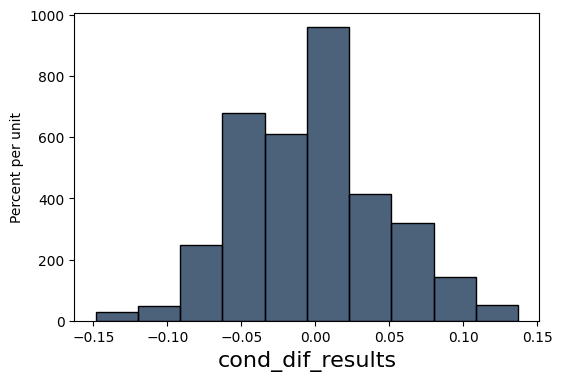

In [22]:
# put results in a table so we can visualize
tot_res = Table().with_columns(
    "cond_dif_results", cond_dif_results
)
tot_res.select("cond_dif_results").hist() # histogram of differences
print(cond_dif) # original estimate of difference
np.sum(tot_res.column("cond_dif_results") >= .091)/1000 # how many greater than observed?
print(statistics.stdev(tot_res.column("cond_dif_results"))) # sd of differences, should be within +/2 SDs, barely excluded
print(np.quantile(tot_res.column("cond_dif_results"), [.025,.975])) # 95%CI for differences, if 0 excluded, then significant